## STAT 207 Lab 7: Regression Models and Inference

Due: Wednesday, March 25, 23:59:59

### Michael Cao AND minhcao2

This lab consists of three main parts: 1) Algebra for linear regression with one explanatory variable; 2) Regression analysis with simulated data; 2) Further analysis of the the lead exposure data.

### Part 1: Simple linear regression math (8 pts)

Background information: The simple linear regression model specifies that a response variable $Y$ depends on an explanatory variable $X$ through its expecation as $E(Y) = \beta_0 + \beta_1 X$. In order to estimate this we get a sample of $(X, Y)$ data: $(x_1, y_1)$, $(x_2, y_2)$, $\ldots$, $(x_n, y_n)$. Let $b_0$ and $b_1$ denote the least squares estimates of the unknown parameters $\beta_0$ and $\beta_1$. In other words, $b_0$ and $b_1$ are the estimated intercept and slope of the least squares regression line.

Given the observed data $(x_1, y_1)$, $(x_2, y_2)$, $\ldots$, $(x_n, y_n)$, the intercept and slope of the regression line solve the following two equations:

\begin{align}
\sum_{i=1}^n (y_i - b_0 - b_1 x_i) = 0\qquad\qquad (1)\\
\sum_{i=1}^n (y_i - b_0 - b_1 x_i) x_i = 0\qquad\qquad (2)\\
\end{align}

**a) (2 pts)** Show how equation (1) implies that $b_0 = \bar{y} - b_1 \bar{x}$ where 
$$
\bar{y} = {1\over n} \sum_{i=1}^n y_i \quad\text{and}\quad \bar{x} = {1\over n} \sum_{i=1}^n x_i.
$$

(Note: if you find it difficult to type or use latex formulas to show your derivation, you can write it out on paper instead, then photograph or scan it and copy the image into a Markdown cell below.)

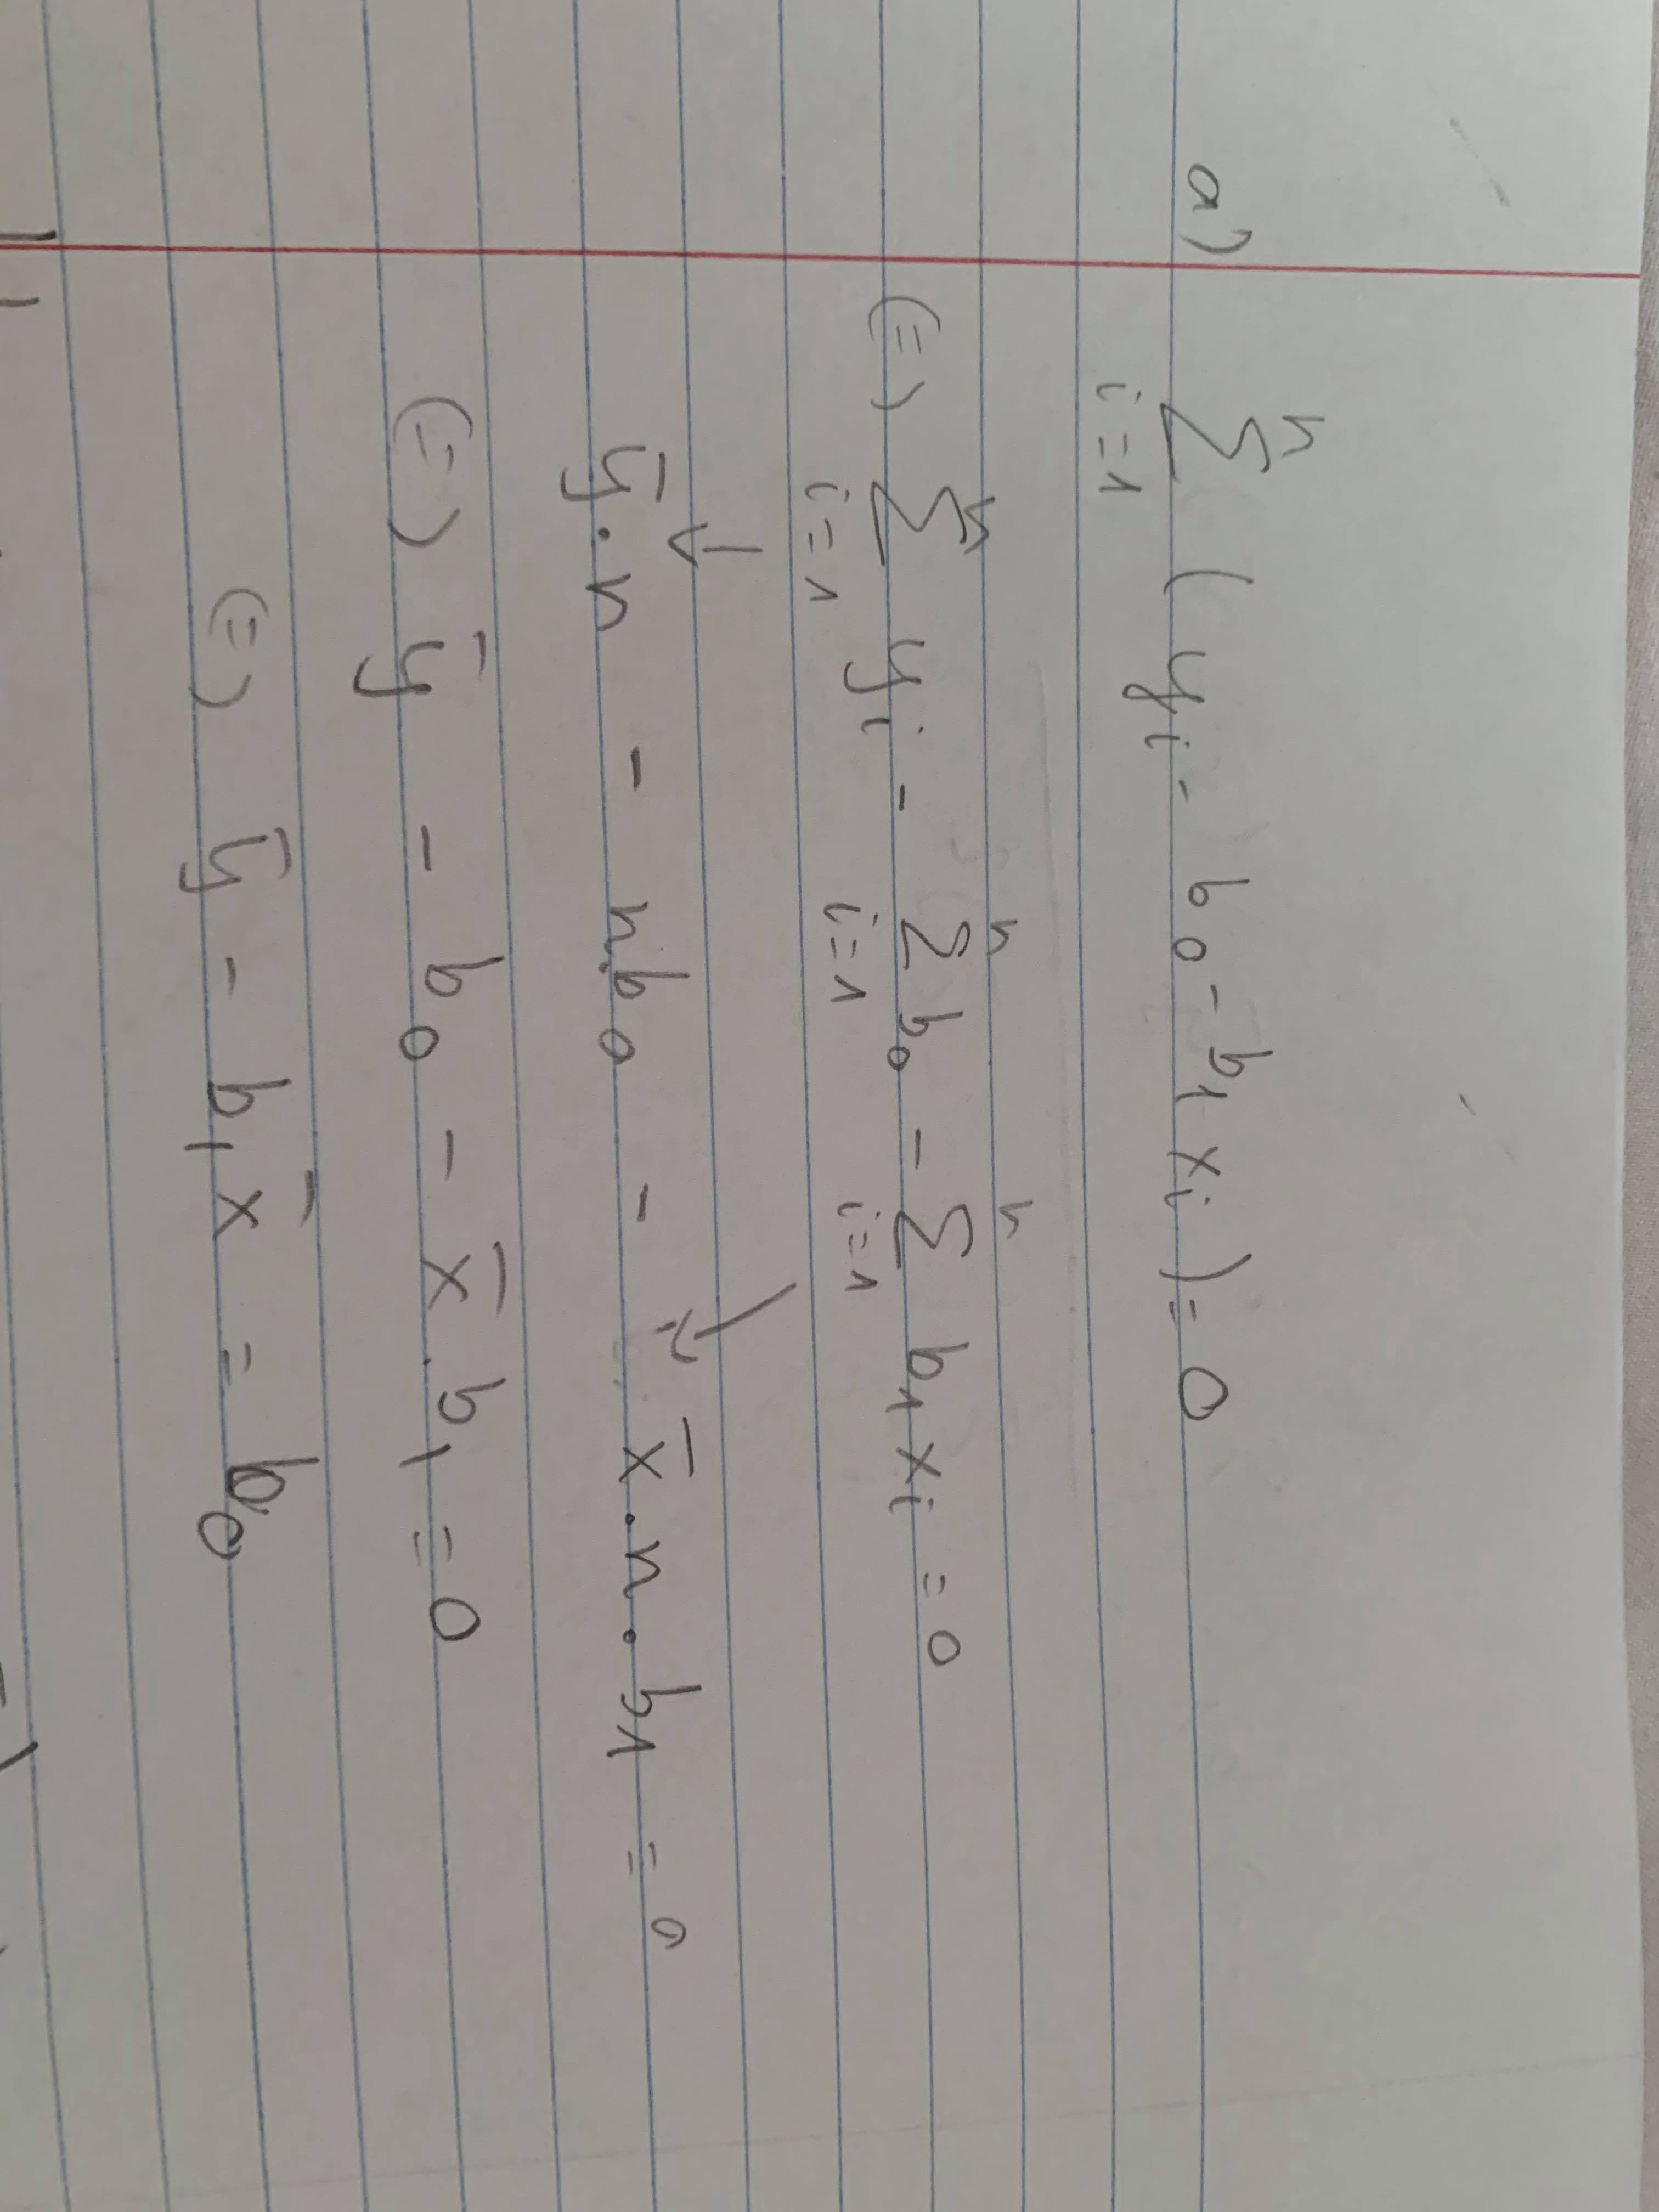

**b) (2 pts)** Show how equation (1) and (2) together imply that

$$
\sum_{i=1}^n (y_i - b_0 - b_1 x_i) (x_i - \bar{x}) = 0\qquad\qquad (3)
$$

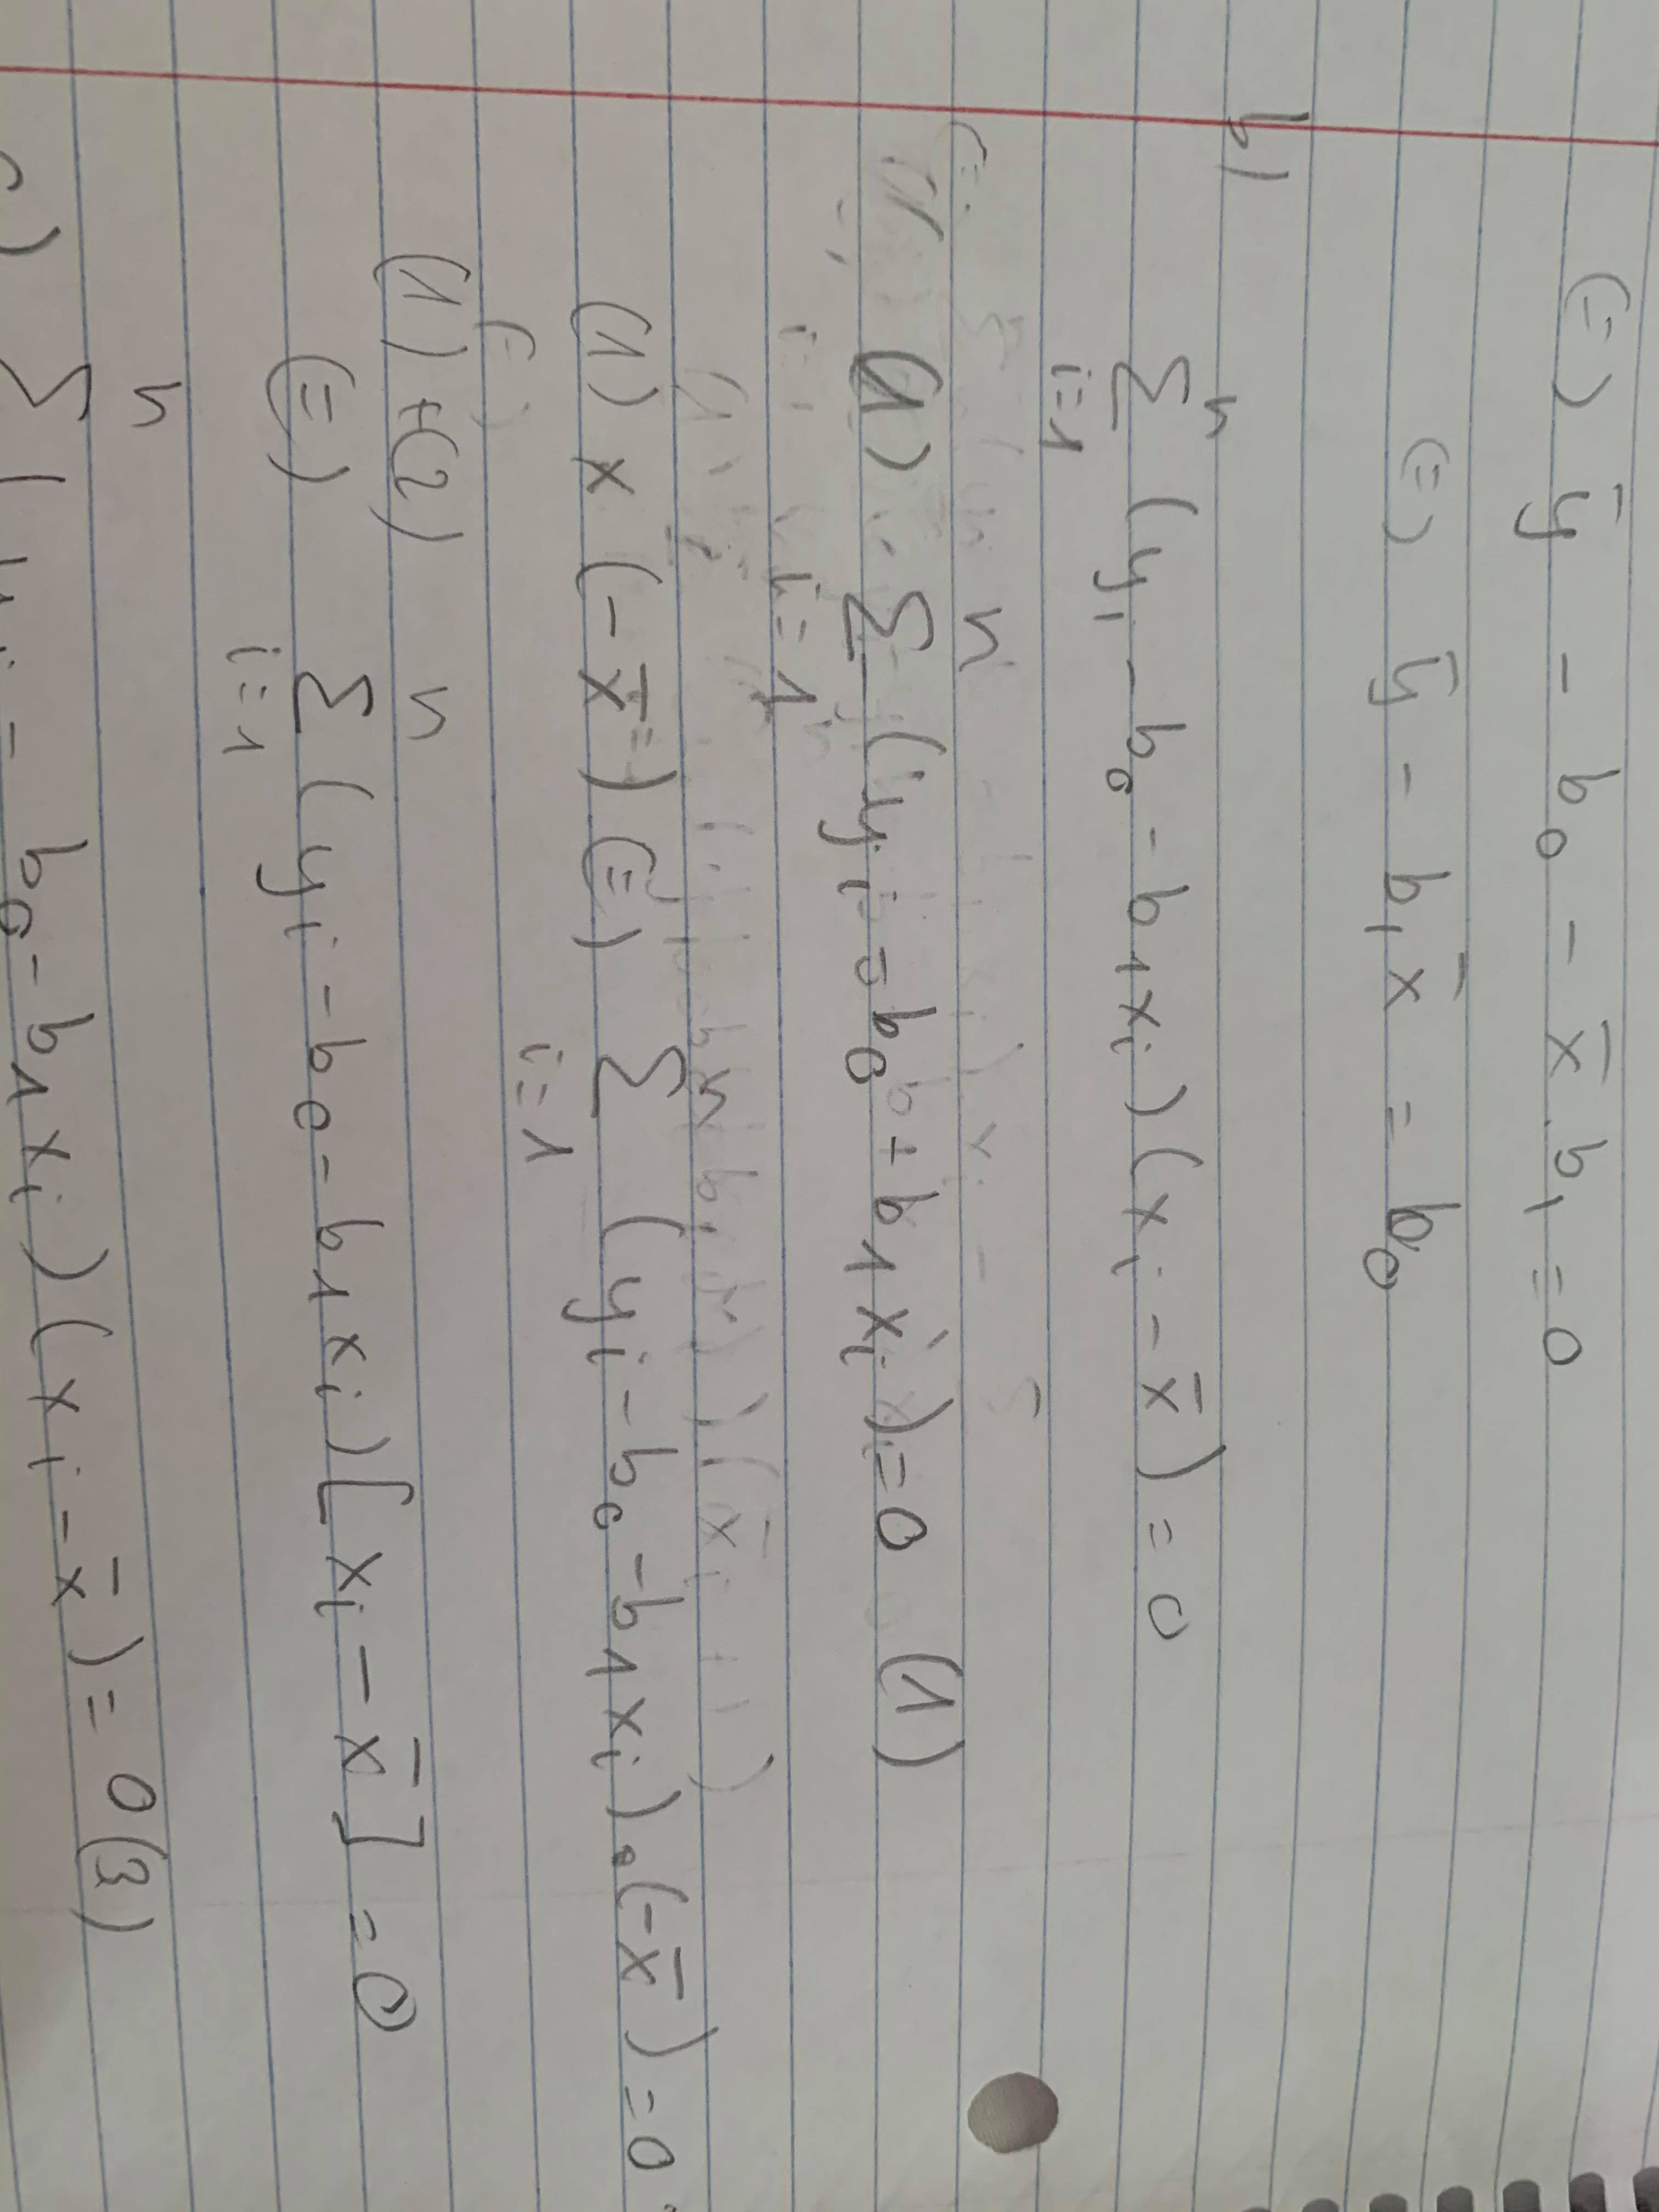

**c) (2 pts)** Substitute the part a) formula for $b_0$ into equation (3) and solve algebraically to show how
$$
b_1 = {\sum_{i=1}^n (y_i - \bar{y}) (x_i - \bar{x}) \over \sum_{i=1}^n (x_i - \bar{x})^2}.
$$

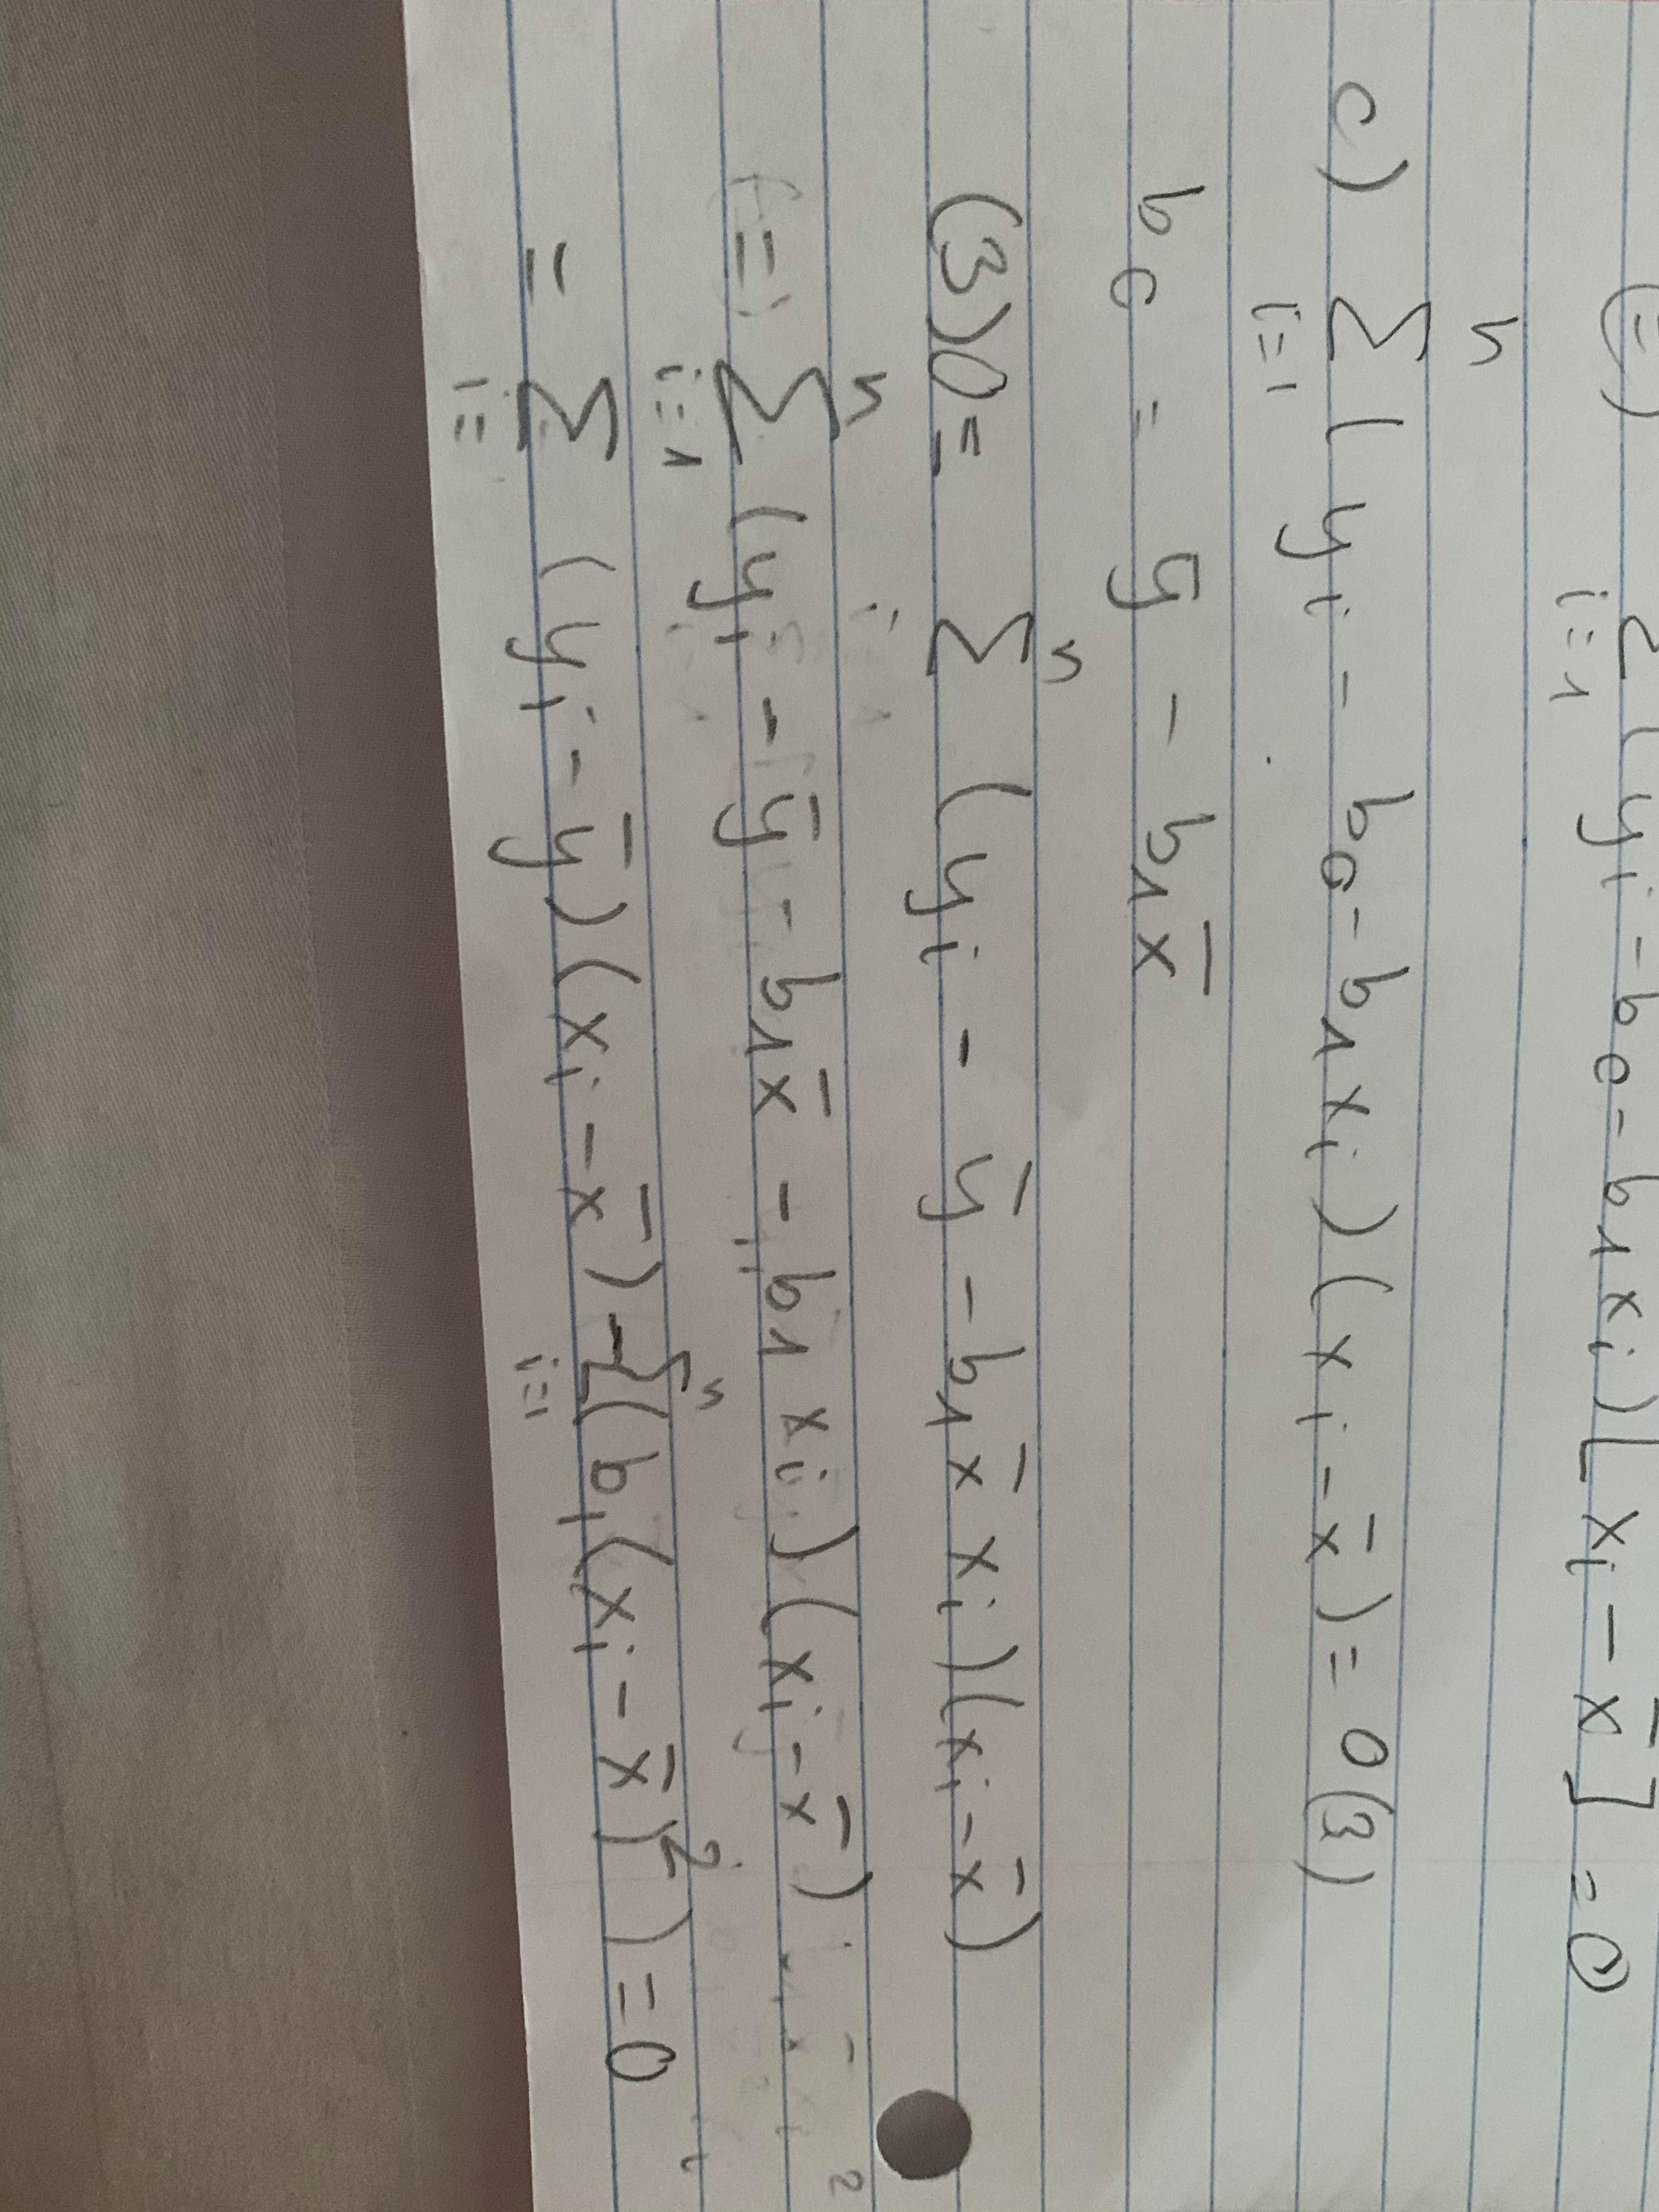

**d) (2 pts)** Data $(x_1, y_1), (x_2, y_2), ..., (x_{10}, y_{10})$ give:
$$
\bar{x} = 12,\quad \bar{y}= 23, \quad 
S_x = \sqrt{{1\over 9}\sum_{i=1}^{10} (x_i - \bar{x})^2} = 5, \quad
S_y = \sqrt{{1\over 9}\sum_{i=1}^{10} (y_i - \bar{y})^2} = 10,
$$
and
$$
r_{xy} = {{1\over 9} \sum_{i=1}^{10} (y_i - \bar{y}) (x_i - \bar{x}) \over S_y \, S_x} = 0.64
$$

Based on this information calculate the slope and intercept of the least squares regression line.

### Part 2: Simulated regression model (10 pts)

In this part we generate data from a linear regression model and analyze them, comparing results to the simulation model. Run the code cells below before doing your work.

In [1]:
import pandas as pd
from scipy.stats import norm
from scipy.stats import uniform
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
# generate regression data and store in data frame called 'df'
b0, b1 = -2.4, 1.75
x = uniform.rvs(loc=0, scale=10, size=28, random_state=12347)
display(x, e)
e = norm.rvs(loc=0, scale=2.2, size=28, random_state=1)
df = pd.DataFrame({'x': x, 'y': b0 + b1*x + e})

array([7.03148581, 5.37772928, 2.48995746, 5.3447177 , 6.31774652,
       5.95825057, 2.2969347 , 3.43245002, 2.16291926, 1.2600718 ,
       5.69377563, 4.27326853, 8.36972444, 5.38877462, 6.18976241,
       6.52025846, 7.69087105, 4.26396228, 5.73398999, 2.05410233,
       1.11197626, 7.13256823, 0.34837806, 1.54519597, 5.9030302 ,
       3.99968401, 4.75593005, 8.03882498])

array([ 3.5735598 , -1.34586411, -1.16197785, -2.36053097,  1.90389678,
       -5.06338513,  3.83858588, -1.67465518,  0.70188601, -0.54861483,
        3.21663746, -4.53230956, -0.70931785, -0.84491958,  2.49429277,
       -2.41976079, -0.37934206, -1.93128852,  0.09287024,  1.28219347,
       -2.42136219,  2.51839216,  1.98349959,  1.10548755,  1.98188309,
       -1.50420129, -0.2703585 , -2.05869276])

In [8]:
df

,x,y
0,7.031486,13.478660
1,5.377729,5.665162
2,2.489957,0.795448
3,5.344718,4.592725
4,6.317747,10.559953
5,5.958251,2.963553
6,2.296935,5.458222
7,3.432450,1.932132
8,2.162919,2.086995
9,1.260072,-0.743489


**a) (3 pts)** Make a scatter plot of y versus x for the data in 'df'. Also compute the sample correlation between them and label or title the plot showing the numerical value of their sample correlation. (See earlier notes for examples of adding titles with numerical information to plots).

,x,y
x,1.000000,0.858948
y,0.858948,1.000000


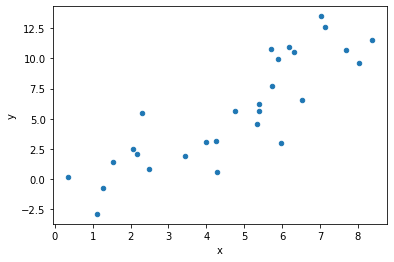

In [10]:
df.plot.scatter(x = 'x', y = 'y')
df.corr()

**b) (3 pts)** Fit a linear regression model with y as the response (endogenous) variable and x as the explanatory (exogenous) variable. Display the model summary.

In [11]:
results = smf.ols('y ~ x', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     73.16
Date:                Sat, 29 May 2021   Prob (F-statistic):           4.94e-09
Time:                        15:49:52   Log-Likelihood:                -62.826
No. Observations:                  28   AIC:                             129.7
Df Residuals:                      26   BIC:                             132.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3929      1.037     -2.308      0.029      -4.524      -0.262
x              1.7138      0.200      8.553      0.000       1.302       2.126
==============================================================================
Omnibus:                        0.319   Durbin-Watson:                   2.793
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.491
Skew:                          -0.075   Prob(JB):                        0.782
Kurtosis:                       2.369   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**c) (2 pts)** Based on the model summary, give the numerical values of the estimated slope and intercept along with their standard errors.

In [21]:
slope = 1.7138
intercept = -2.3929
print(slope)
print(intercept)

1.7138
-2.3929


**d) (2 pts)** Based on the model summary or otherwise, provide a $95\%$ confidence interval for the regression slope parameter (coefficient of x). Does your confidence interval include the true value for $\beta_1$ that we know from the simulation model (yes/no)?

In [23]:
'yes'

'yes'

### Part 3: Multiple regression analysis of lead study (7 pts)

**a) (4 pts) Using the data from 'leadstudy.csv' fit a linear regression model with 'fulliq' as the response variable and 'age' and 'group' as the two explanatory variables. Show the summary of results from the ols fitted model.**

The file 'leadstudy.csv' is included in the same folder as this lab notebook. It contains data from the lead exposure study discussed in our class notes. We will focus on the response variable 'fulliq', which is an IQ test measurement, and two explanatory variables: the lead exposure level 'group', which has the values 'lead < 40' and 'lead >= 40', and 'age'. This analysis will give us an age adjusted analysis of the association between exposure group and the response.

In [28]:
df1 = pd.read_csv("leadstudy.csv")
df1

,id,age,sex,status,verbiq,perfiq,fulliq,iqtype,totyrs,group
0,101,11.083333,M,77,61,85,70,WISC,11,lead < 40
1,102,9.416667,M,77,82,90,85,WISC,6,lead < 40
2,103,11.083333,M,30,70,107,86,WISC,5,lead < 40
3,104,6.916667,M,77,72,85,76,WISC,5,lead < 40
4,105,11.250000,M,62,72,100,84,WISC,11,lead < 40
...,...,...,...,...,...,...,...,...,...,...
119,603,5.583333,F,58,91,92,91,WPPSI,5,lead >= 40
120,604,4.583333,M,77,92,100,92,WPPSI,3,lead >= 40
121,605,5.166667,F,58,81,77,77,WPPSI,5,lead >= 40
122,606,3.833333,M,70,111,108,111,WPPSI,3,lead >= 40


In [31]:
dftest = df1[['age','fulliq','group']]
dftest


,age,fulliq,group
0,11.083333,70,lead < 40
1,9.416667,85,lead < 40
2,11.083333,86,lead < 40
3,6.916667,76,lead < 40
4,11.250000,84,lead < 40
...,...,...,...
119,5.583333,91,lead >= 40
120,4.583333,92,lead >= 40
121,5.166667,77,lead >= 40
122,3.833333,111,lead >= 40


In [33]:
result = smf.ols('fulliq ~ age + group', data = dftest ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fulliq   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.667
Date:                Tue, 24 Mar 2020   Prob (F-statistic):              0.193
Time:                        08:58:26   Log-Likelihood:                -504.53
No. Observations:                 124   AIC:                             1015.
Df Residuals:                     121   BIC:                             1024.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              92.9088      3.806     24.411      0.000      85.374     100.444
group[T.lead >= 40]    -4.8656      2.692     -1.808      0.073     -10.195       0.464
age                    -0.0026      0.369     -0.007      0.994      -0.733       0.728
==============================================================================
Omnibus:                        5.676   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                8.599
Skew:                           0.075   Prob(JB):                       0.0136
Kurtosis:                       4.281   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**b) (2 pts)** When the statsmodels.ols function uses 'group' as an exogenous variable, it constructs a 0/1 binary variable:

$$
\text{group[T.lead >= 40]} = \cases{1,& if group="lead >= 40"\\ 0,& if group="lead < 40"\\}
$$

What is the estimated coefficient for this variable in the model? What is the p-value for the test of $H_0:$ group coefficient = 0?

In [1]:
coeff = 92.9088
print(coeff)


92.9088


**c) (1 pt)** What proportion of the variance in 'fulliq' is explained by the regression model, according to the model summary? Explain where you got the number.